PART 02 파이썬 분석

> CHAPTER 04 모의고사
> >SECTION 01 모의고사 작업형 1회
> > >**01 제1유형**

In [6]:
# 본 도서는 구글 코랩과 구글 드라이브 환경을 기준으로 하고 있습니다.
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# csv 파일이 위치한 디렉토리 입력
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airquality.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [8]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [9]:
# Ozone 컬럼의 결측치를 0으로 대체
# 대체 이전과 이후의 평균을 출력
print(df["Ozone"].isnull().sum())         # Ozone 컬럼의 결측치 개수 출력
Ozone_mean = df["Ozone"].mean()           # Ozone 컬럼의 평균

df["Ozone"].fillna(0, inplace=True)       # Ozone 컬럼의 결측치를 평균으로 대체

print(df["Ozone"].isnull().sum())         # 대치 후 Ozone 컬럼의 결측치 개수 출력
Ozone_mean2 = df["Ozone"].mean()          # 대치 후 Ozone 컬럼의 평균

print(Ozone_mean)
print(Ozone_mean2)

37
0
42.12931034482759
31.941176470588236


In [10]:
print(Ozone_mean-Ozone_mean2)

10.188133874239352


In [11]:
# Min-Max 표준화, Z 표준화 변환뒤 컬럼 추가
# 소수점 2자리까지 표시
Min = np.min(df["Wind"])
Max = np.max(df["Wind"])
df["min_max"] = round((df["Wind"] - Min)/(Max - Min), 2)

Mean = np.mean(df["Wind"])
Std = np.std(df["Wind"])
df["z"] = round((df["Wind"] - Mean)/Std, 2)

In [12]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day,min_max,z
0,41.0,190.0,7.4,67,5,1,0.30,-0.73
1,36.0,118.0,8.0,72,5,2,0.33,-0.56
2,12.0,149.0,12.6,74,5,3,0.57,0.75
3,18.0,313.0,11.5,62,5,4,0.52,0.44
4,0.0,NaN,14.3,56,5,5,0.66,1.24
...,...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,0.27,-0.87
149,0.0,145.0,13.2,77,9,27,0.61,0.92
150,14.0,191.0,14.3,75,9,28,0.66,1.24
151,18.0,131.0,8.0,76,9,29,0.33,-0.56


In [13]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day,min_max,z
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,31.941176,185.931507,9.957516,77.882353,6.993464,15.803922,0.433333,-0.000065
std,33.924497,90.058422,3.523001,9.465270,1.416522,8.864520,0.185696,1.003679
min,0.000000,7.000000,1.700000,56.000000,5.000000,1.000000,0.000000,-2.350000
25%,4.000000,115.750000,7.400000,72.000000,6.000000,8.000000,0.300000,-0.730000
50%,21.000000,205.000000,9.700000,79.000000,7.000000,16.000000,0.420000,-0.070000
75%,46.000000,258.750000,11.500000,85.000000,8.000000,23.000000,0.520000,0.440000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000,3.060000


In [14]:
# 월별 평균기온
print(df.groupby("Month")['Temp'].mean())

Month
5    65.548387
6    79.100000
7    83.903226
8    83.967742
9    76.900000
Name: Temp, dtype: float64


>>>**02 제2유형**

In [15]:
# 본 도서는 구글 코랩과 구글 드라이브 환경을 기준으로 하고 있습니다.
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

cur_dir = '/content/drive/MyDrive/Colab Notebooks/'       # 현재 디렉토리 입력
ploan = pd.read_csv(cur_dir + "Bank_Personal_Loan_Modelling.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
ploan.shape     # 데이터 차원 확인

(5000, 14)

In [17]:
ploan.head(10)  # 데이터 예시 확인

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [18]:
# 의미없는 변수 제거 + NaN 관측치 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [19]:
# ploan_processed의 독립변수와 종속변수를 나눠 저장한다.
X = ploan_processed.drop(["Personal Loan"], axis=1)
y = ploan_processed['Personal Loan']      # 대출여부: 1 or 0

In [20]:
from sklearn.model_selection import train_test_split

# personal Loan으로 학습 데이터와 테스트 데이터로 나누기(7:3)
# 종속변수인 Personal Loan(대출여부)의 범주간 비율 차이가 크기 때문에 train_test_split() 함수의 stratify(계층샘플)에 y를 입력
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 11) (1500, 11) (3500,) (1500,)


In [21]:
# 전처리 수행하는 sklearn의 패키지를 불러온다.
import sklearn.preprocessing as preprocessing
preprocessor = preprocessing.Normalizer()

In [22]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

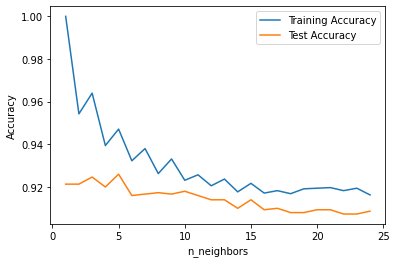

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

# 1 에서 25 까지 n_neighbors를 적용
neighbors_settings = range(1, 25)

# KNeighborsClassifier() 함수에 K개수를 입력하여 모델을 만들고 트레이닝 데이터와 테스트 데이터를 적용
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

# K의 변화량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [25]:
test_accuracy

[0.9213333333333333,
 0.9213333333333333,
 0.9246666666666666,
 0.92,
 0.926,
 0.916,
 0.9166666666666666,
 0.9173333333333333,
 0.9166666666666666,
 0.918,
 0.916,
 0.914,
 0.914,
 0.91,
 0.914,
 0.9093333333333333,
 0.91,
 0.908,
 0.908,
 0.9093333333333333,
 0.9093333333333333,
 0.9073333333333333,
 0.9073333333333333,
 0.9086666666666666]